In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.nlp import *
from sklearn.linear_model import LogisticRegression

## create dataset

In [2]:
PATH='data/aclImdb/'
names = ['neg','pos']
names1 = ['neg', 'pos_']
names2 = ['neg_', 'pos']

In [3]:
! ls {PATH}train

labeledBow.feat pos             unsupBow.feat   urls_pos.txt
neg             unsup           urls_neg.txt    urls_unsup.txt


In [4]:
trn1,trn1_y = texts_labels_from_folders(f'{PATH}train',names1)
val1,val1_y = texts_labels_from_folders(f'{PATH}test',names1)

In [5]:
trn2,trn2_y = texts_labels_from_folders(f'{PATH}train',names2)
val2,val2_y = texts_labels_from_folders(f'{PATH}test',names2)

In [6]:
len(trn1), len(trn1_y), len(trn2), len(trn2_y)

(12500, 12500, 12500, 12500)

In [7]:
assert (trn1_y==0).all()
(trn1_y==0).all()

True

In [8]:
assert (trn1_y==0).all()
(val1_y==0).all()

True

In [9]:
assert (trn2_y==1).all()
(trn2_y==1).all()

True

In [10]:
assert (val2_y==1).all()
(val2_y==1).all()

True

In [11]:
def sample_util(data, label, n):
    assert len(data) == label.shape[0]
    idx = np.random.choice(range(len(data)),n)
    data_new = [data[i] for i in idx]
    label_new = label[idx]
    return data_new, label_new

In [12]:
def sample(data1, label1, data2, label2, n):
    t1, t2 = sample_util(data1, label1, n)
    t3, t4 = sample_util(data2, label2, n)
    data = t1 + t3
    label = np.concatenate((t2, t4))
    return data, label

In [13]:
trn, trn_y = sample(trn1, trn1_y, trn2, trn2_y, 64*10)
val, val_y = sample(val1, val1_y, val2, val2_y, 64*20)

In [14]:
# trn,trn_y = texts_labels_from_folders(f'{PATH}train',names)
# val,val_y = texts_labels_from_folders(f'{PATH}test',names)

## create vectors and vocab

In [15]:
veczr = CountVectorizer(tokenizer=tokenize)

In [16]:
trn_term_doc = veczr.fit_transform(trn)

In [17]:
val_term_doc = veczr.transform(val)

In [18]:
vocab = veczr.get_feature_names(); vocab[5000:5005]

['develops', 'devgan', 'deviates', 'device', 'devices']

In [19]:
vocab[:5]

['!', '"', '#', '$', '%']

In [20]:
len(vocab)

20133

In [21]:
trn_term_doc = trn_term_doc.sign()

In [22]:
val_term_doc = val_term_doc.sign()

## Naive Bayes

We define the **log-count ratio** $r$ for each word $f$:

$r = \log \frac{\text{ratio of feature $f$ in positive documents}}{\text{ratio of feature $f$ in negative documents}}$

where ratio of feature $f$ in positive documents is the number of times a positive document has a feature divided by the number of positive documents.

In [178]:
def pr(y_i):
    p = x[y==y_i].sum(0)
    return p+1

In [179]:
x=trn_term_doc
y=trn_y

p = pr(1)/pr(1).sum()
q = pr(0)/pr(0).sum()
r = np.log(p/q)
b = np.log((y==1).mean() / (y==0).mean())

In [180]:
val_term_doc.shape

(2560, 20133)

In [181]:
val_term_doc.shape[1]

20133

In [182]:
x.shape

(1280, 20133)

In [183]:
r.shape

(1, 20133)

In [184]:
b

0.0

In [185]:
val_term_doc

<2560x20133 sparse matrix of type '<class 'numpy.int64'>'
	with 362160 stored elements in Compressed Sparse Row format>

In [29]:
(val_term_doc @ r.T).shape

(2560, 1)

In [30]:
val_term_doc @ r.T

matrix([[ -2.10261],
        [-10.25514],
        [-14.34487],
        ...,
        [  0.62989],
        [ 12.3097 ],
        [ 16.51772]])

In [31]:
val_y

array([0, 0, 0, ..., 1, 1, 1])

In [32]:
pre_preds = val_term_doc @ r.T + b
preds = pre_preds.T>0
(preds==val_y).mean()

0.796875

In [33]:
pre_preds = val_term_doc @ np.stack([np.log(p), np.log(q)]).T + b

In [34]:
pre_preds

matrix([[ -392.34239,  -390.23978],
        [ -569.22569,  -558.97055],
        [-1240.87963, -1226.53476],
        ...,
        [ -786.44062,  -787.07052],
        [-1047.79872, -1060.10842],
        [-1306.4478 , -1322.96552]])

In [35]:
preds = pre_preds.T[0] > pre_preds.T[1]
(preds==val_y).mean()

0.796875

In [36]:
type(val_term_doc)

scipy.sparse.csr.csr_matrix

In [37]:
val_term_doc[0]

<1x20133 sparse matrix of type '<class 'numpy.int64'>'
	with 53 stored elements in Compressed Sparse Row format>

In [38]:
xx = val_term_doc[0]

In [39]:
xx.toarray().shape

(1, 20133)

In [40]:
[vocab[index] for index, i in enumerate(xx.toarray()[0]) if i > 0]

["'",
 ',',
 '.',
 'a',
 'actor',
 'andrew',
 'bad',
 'been',
 'casting',
 'circuit',
 'feel',
 'festival',
 'film',
 'for',
 'getting',
 'glad',
 'good',
 'has',
 'he',
 'him',
 'i',
 'is',
 'it',
 'job',
 'last',
 'lately',
 'like',
 'looks',
 'maybe',
 'mccarthy',
 'minute',
 'not',
 'obvious',
 'on',
 'picked',
 'poorly',
 'role',
 'roles',
 'rush',
 's',
 'shall',
 'shot',
 'stage',
 'stay',
 'the',
 'this',
 'up',
 'very',
 'was',
 'weak',
 'who',
 'writing',
 'yet']

In [41]:
total = 0
for index, i in enumerate(xx.toarray()[0]):
    if i:
        total += 1
total

53

## Logistic regression (sklearn)

Here is how we can fit logistic regression where the features are the unigrams.

In [42]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [43]:
m = LogisticRegression(C=1e8, dual=False, max_iter=1000)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

0.821875

...and the regularized version

In [44]:
m = LogisticRegression(C=1.0, dual=False, max_iter=1000)
m.fit(x, y)
preds = m.predict(val_term_doc)
(preds==val_y).mean()

0.821875

## Logistic regression (PyTorch)

In [293]:
type(r), r.shape

(numpy.matrix, (1, 20133))

In [298]:
FloatTensor(r)[0].reshape(-1,1)

tensor([[-0.2214],
        [-0.0593],
        [-0.1898],
        ...,
        [-0.7288],
        [-0.7288],
        [-0.7288]])

In [301]:
trn_term_doc[0].nonzero()[1]

array([    0,     5,    11,    13,    14,   283,   285,   286,   292,   449,   758,   928,  1860,  2141,
        2357,  2504,  2670,  2930,  4182,  5371,  6317,  6858,  7741,  7878,  7921,  7985,  8061,  8141,
        8193,  8456,  8526,  8684,  8721,  9284,  9577,  9603, 10020, 10897, 11879, 12025, 12331, 12484,
       12532, 12563, 12634, 12715, 13189, 13257, 13494, 13502, 14492, 15455, 16112, 16968, 17955, 17963,
       18023, 18184, 18244, 18412, 18977, 19017, 19188, 19668, 19673, 19724, 19795, 19888, 20033],
      dtype=int32)

In [328]:
class SimpleNB2(nn.Module):
    def __init__(self, nf, ny):
        super().__init__()
        self.w = nn.Embedding(nf, ny)
        # self.w = nn.Embedding(nf+1, ny)
        # self.w.weight.data.uniform_(-1, 1)
        self.w.weight.data = torch.FloatTensor(r)[0].reshape(-1,1)
        # self.r = nn.Embedding(nf, ny)
        
    def forward(self, feat_idx):
        idx = feat_idx.nonzero()[1]
        v = self.w(V(idx))
        x = v.sum()
        return x

In [329]:
net_a = SimpleNB2(len(vocab),1)

In [330]:
idx = trn_term_doc[0].nonzero()[1]
idx

array([    0,     5,    11,    13,    14,   283,   285,   286,   292,   449,   758,   928,  1860,  2141,
        2357,  2504,  2670,  2930,  4182,  5371,  6317,  6858,  7741,  7878,  7921,  7985,  8061,  8141,
        8193,  8456,  8526,  8684,  8721,  9284,  9577,  9603, 10020, 10897, 11879, 12025, 12331, 12484,
       12532, 12563, 12634, 12715, 13189, 13257, 13494, 13502, 14492, 15455, 16112, 16968, 17955, 17963,
       18023, 18184, 18244, 18412, 18977, 19017, 19188, 19668, 19673, 19724, 19795, 19888, 20033],
      dtype=int32)

In [331]:
net_a.w(V(idx)).sum()

tensor(-12.5095, grad_fn=<SumBackward0>)

In [332]:
net_a(trn_term_doc[0])

tensor(-12.5095, grad_fn=<SumBackward0>)

## Logistic regression (Fastai)

In [45]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *
from fastai.nlp import *

import torch.nn as nn

In [232]:
class MySimpleNB(nn.Module):
    def __init__(self, nf, ny):
        super().__init__()
        self.w = nn.Embedding(nf, ny)
        # self.w = nn.Embedding(nf+1, ny)
        # self.w.weight.data.uniform_(-1, 1)
        self.w.weight.data = torch.FloatTensor(r.tolist()[0])
        self.w.weight.data = self.w.weight.data.reshape(-1, 1)
        # self.r = nn.Embedding(nf, ny)
        
    def forward(self, feat_idx):
        # self.w.weight.data[0] = 0
        # idx = feat_idx - 1
        idx = feat_idx
        idx2 = [a for a in idx if a >= 0]
        idx3 = np.array(idx2)
        v = self.w(V(idx3))
        # r = self.r(feat_idx)
        # x = ((w+self.w_adj)*r/self.r_adj).sum(1)
        # x = w*r
        x = v.sum(1)
        # return F.softmax(x)
        # return x.reshape(1, -1)
        return x

In [47]:
def binary_loss(pred, y):
    # y2 = torch.max(y,axis=1)[0]
    y2 = np.argmax(y)
    p = torch.exp(pred) / (1+torch.exp(pred))
    result = torch.mean(-(y2 * torch.log(p) + (1-y2)*torch.log(1-p)))
    # return result.reshape(1, -1)
    return result

In [48]:
r.shape

(1, 20133)

In [49]:
len(vocab)

20133

In [50]:
net3 = MySimpleNB(len(vocab), 1)

In [51]:
net3.w.weight.data.shape

torch.Size([20133, 1])

In [52]:
r.shape

(1, 20133)

In [53]:
sl=val_term_doc.shape[1]
sl

20133

In [110]:
sl=val_term_doc.shape[1]
md = TextClassifierData.from_bow(
    trn_term_doc, trn_y,
    val_term_doc, val_y,
    200,
)

In [111]:
# ??TextClassifierData.from_bow

In [112]:
trn_term_doc.shape

(1280, 20133)

In [113]:
ii=0

In [114]:
net4 = MySimpleNB(len(vocab), 1)
# loss = nn.NLLLoss()
# loss = torch.nn.CrossEntropyLoss()
loss = binary_loss
lr = 1e-2
losses=[]

In [115]:
net4.w.weight

Parameter containing:
tensor([[-0.2214],
        [-0.0593],
        [-0.1898],
        ...,
        [-0.7288],
        [-0.7288],
        [-0.7288]], requires_grad=True)

In [116]:
ii=2

In [117]:
t = md.trn_ds[ii]
ii = ii + 1
xt, _a, _b, yt = t

In [118]:
t

(array([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     7,    12,    14,   293,   611,   759,   903,   929,  1000,  1154,  1346,  1861,  2146,
         2153,  2653,  4135,  5372,  5416,  58

In [119]:
xt.shape, len(vocab)

((200,), 20133)

In [120]:
xt.shape

(200,)

In [121]:
vocab[18178], len(vocab)

('titles', 20133)

In [122]:
_a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [123]:
_a.sum()

87

In [124]:
_b

87

In [125]:
yt

array([1., 0.], dtype=float32)

In [126]:
md.trn_ds[ii]

(array([11480, 11635, 11726, 11741, 11836, 11877, 11896, 11941, 11942, 11946, 11966, 11983, 12088, 12126,
        12140, 12142, 12184, 12186, 12264, 12332, 12358, 12386, 12430, 12485, 12486, 12508, 12548, 12555,
        12561, 12563, 12564, 12596, 12635, 12649, 12652, 12661, 12704, 12706, 12716, 12848, 12935, 12985,
        13046, 13062, 13118, 13133, 13139, 13190, 13213, 13341, 13440, 13517, 13557, 13605, 13607, 13938,
        13942, 13964, 13973, 13976, 13997, 14082, 14103, 14144, 14195, 14280, 14282, 14299, 14471, 14482,
        14483, 14504, 14506, 14507, 14518, 14550, 14610, 14618, 14739, 14851, 15106, 15110, 15123, 15191,
        15194, 15231, 15232, 15304, 15390, 15414, 15488, 15561, 15584, 15630, 15719, 15723, 15733, 15804,
        15819, 15847, 15863, 15870, 15996, 15997, 16031, 16090, 16097, 16134, 16205, 16211, 16290, 16309,
        16406, 16422, 16571, 16635, 16931, 17013, 17189, 17297, 17358, 17436, 17477, 17500, 17565, 17590,
        17599, 17611, 17623, 17649, 17694, 178

In [127]:
xt.shape

(200,)

In [128]:
for index, idx in enumerate(to_np(xt)):
    if idx:
        print(vocab[idx-1])

'
,
.
a
after
all
an
and
another
aren
at
believe
blood
bloody
but
couldn
does
don
either
even
ever
eyes
fake
film
films
gore
had
has
have
horror
hour
i
in
intelligence
interesting
is
isn
it
just
killing
line
looks
many
meaning
meaningful
mindless
movie
movies
my
no
nor
of
once
one
or
other
out
overall
plain
plot
point
pointless
probably
revolting
s
saw
scary
scenes
story
t
that
the
then
there
this
time
to
two
unlike
ve
very
violence
waste
watched
with
worst
your


In [129]:
vocab[0], len(vocab)

('!', 20133)

In [130]:
xt

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     7,    12,    14,   293,   611,   759,   903,   929,  1000,  1154,  1346,  1861,  2146,
        2153,  2653,  4135,  5372,  5416,  5871,  6309,

In [131]:
net4.w(V(xt)).sum()

tensor(-33.4714, grad_fn=<SumBackward0>)

In [132]:
xt.shape

(200,)

In [133]:
xt.shape

(200,)

In [134]:
y_pred = net4(V(xt))
print(y_pred)
l = binary_loss(y_pred, yt)

tensor([-0.0760, -0.0552, -0.0341, -0.0388,  0.0767, -0.0235,  0.0645, -0.0275,
        -0.0251,  0.0597, -0.0600, -0.4709, -0.5952, -0.4709, -0.1311, -0.5952,
        -0.1986, -0.4072, -0.9699, -0.4183, -0.2761, -0.0356, -1.2884,  0.0718,
         0.3257, -0.6681, -0.2218,  0.0104, -0.1534, -0.4485, -0.7859, -0.1047,
        -0.0303, -0.9911, -0.1534, -0.0218, -0.4151, -0.0445, -0.2907, -0.2075,
        -0.0856, -0.4631,  0.2298, -0.1410, -1.6451, -0.5056, -0.2012, -0.2192,
         0.0652, -0.4351, -0.5152, -0.0539,  0.0166, -0.0466, -0.2279,  0.1096,
        -0.0058,  0.3952, -1.0164, -0.5157, -0.2050, -2.2328, -0.0201, -1.4219,
         0.0771, -0.2260, -0.1787,  0.0044,  0.1619, -0.2513, -0.0763, -0.0451,
        -0.2861, -0.1960, -0.0839, -0.0489, -0.0423,  0.0922,  0.0979, -0.2009,
         0.1582,  0.0922, -1.9159,  0.0756, -0.0311, -2.1341, -0.2096],
       grad_fn=<SumBackward1>)


In [135]:
y_pred

tensor([-0.0760, -0.0552, -0.0341, -0.0388,  0.0767, -0.0235,  0.0645, -0.0275,
        -0.0251,  0.0597, -0.0600, -0.4709, -0.5952, -0.4709, -0.1311, -0.5952,
        -0.1986, -0.4072, -0.9699, -0.4183, -0.2761, -0.0356, -1.2884,  0.0718,
         0.3257, -0.6681, -0.2218,  0.0104, -0.1534, -0.4485, -0.7859, -0.1047,
        -0.0303, -0.9911, -0.1534, -0.0218, -0.4151, -0.0445, -0.2907, -0.2075,
        -0.0856, -0.4631,  0.2298, -0.1410, -1.6451, -0.5056, -0.2012, -0.2192,
         0.0652, -0.4351, -0.5152, -0.0539,  0.0166, -0.0466, -0.2279,  0.1096,
        -0.0058,  0.3952, -1.0164, -0.5157, -0.2050, -2.2328, -0.0201, -1.4219,
         0.0771, -0.2260, -0.1787,  0.0044,  0.1619, -0.2513, -0.0763, -0.0451,
        -0.2861, -0.1960, -0.0839, -0.0489, -0.0423,  0.0922,  0.0979, -0.2009,
         0.1582,  0.0922, -1.9159,  0.0756, -0.0311, -2.1341, -0.2096],
       grad_fn=<SumBackward1>)

In [136]:
print(net4.w.weight.grad)

None


In [137]:
l.shape

torch.Size([])

In [138]:
l.backward()

In [139]:
_a.shape, _a

((200,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [140]:
for idx, i in enumerate(net4.w.weight.grad.data):
    for j in i:
        if j != 0:
            print(idx, j, net4.w.weight.data[idx])

6 tensor(0.0055) tensor([-0.0760])
11 tensor(0.0056) tensor([-0.0552])
13 tensor(0.0056) tensor([-0.0341])
292 tensor(0.0056) tensor([-0.0388])
610 tensor(0.0060) tensor([0.0767])
758 tensor(0.0057) tensor([-0.0235])
902 tensor(0.0059) tensor([0.0645])
928 tensor(0.0057) tensor([-0.0275])
999 tensor(0.0057) tensor([-0.0251])
1153 tensor(0.0059) tensor([0.0597])
1345 tensor(0.0056) tensor([-0.0600])
1860 tensor(0.0044) tensor([-0.4709])
2145 tensor(0.0041) tensor([-0.5952])
2152 tensor(0.0044) tensor([-0.4709])
2652 tensor(0.0054) tensor([-0.1311])
4134 tensor(0.0041) tensor([-0.5952])
5371 tensor(0.0052) tensor([-0.1986])
5415 tensor(0.0046) tensor([-0.4072])
5870 tensor(0.0032) tensor([-0.9699])
6308 tensor(0.0046) tensor([-0.4183])
6317 tensor(0.0050) tensor([-0.2761])
6561 tensor(0.0056) tensor([-0.0356])
6619 tensor(0.0025) tensor([-1.2884])
6871 tensor(0.0060) tensor([0.0718])
6880 tensor(0.0067) tensor([0.3257])
7812 tensor(0.0039) tensor([-0.6681])
8121 tensor(0.0051) tensor([-0

In [141]:
net4.w.weight.data -= net4.w.weight.grad.data * lr

In [142]:
lr

0.01

In [143]:
net4.w.weight.data

tensor([[-0.2214],
        [-0.0593],
        [-0.1898],
        ...,
        [-0.7288],
        [-0.7288],
        [-0.7288]])

In [144]:
net4.w.weight.grad.data

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [145]:
for i in net4.w.weight.grad.data:
    for j in i:
        if j != 0:
            print(j)

tensor(0.0055)
tensor(0.0056)
tensor(0.0056)
tensor(0.0056)
tensor(0.0060)
tensor(0.0057)
tensor(0.0059)
tensor(0.0057)
tensor(0.0057)
tensor(0.0059)
tensor(0.0056)
tensor(0.0044)
tensor(0.0041)
tensor(0.0044)
tensor(0.0054)
tensor(0.0041)
tensor(0.0052)
tensor(0.0046)
tensor(0.0032)
tensor(0.0046)
tensor(0.0050)
tensor(0.0056)
tensor(0.0025)
tensor(0.0060)
tensor(0.0067)
tensor(0.0039)
tensor(0.0051)
tensor(0.0058)
tensor(0.0053)
tensor(0.0045)
tensor(0.0036)
tensor(0.0054)
tensor(0.0057)
tensor(0.0031)
tensor(0.0053)
tensor(0.0057)
tensor(0.0046)
tensor(0.0056)
tensor(0.0049)
tensor(0.0052)
tensor(0.0055)
tensor(0.0044)
tensor(0.0064)
tensor(0.0053)
tensor(0.0019)
tensor(0.0043)
tensor(0.0052)
tensor(0.0051)
tensor(0.0059)
tensor(0.0045)
tensor(0.0043)
tensor(0.0056)
tensor(0.0058)
tensor(0.0056)
tensor(0.0051)
tensor(0.0061)
tensor(0.0057)
tensor(0.0069)
tensor(0.0031)
tensor(0.0043)
tensor(0.0052)
tensor(0.0011)
tensor(0.0057)
tensor(0.0022)
tensor(0.0060)
tensor(0.0051)
tensor(0.0

In [146]:
net4.w.weight.grad.data.zero_()

tensor([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

In [147]:
from datetime import datetime

In [148]:
len(md.trn_ds)

1280

In [149]:
a1, a2, a3, a4 = md.trn_ds[0]

In [150]:
a1

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     1,     6,

In [151]:
a2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [152]:
a3

69

In [153]:
a4, np.argmax(a4)

(array([1., 0.], dtype=float32), 0)

In [154]:
torch.max(V(a4))

tensor(1.)

In [155]:
loss(net4(V(a1)), V(a4))

tensor(0.6374, grad_fn=<MeanBackward0>)

In [156]:
net4(V(a1))

tensor([-0.2214,  0.0788, -0.0553, -0.0341, -0.0602, -0.0710, -0.0710, -0.4645,
        -0.0389,  0.2911, -0.0235, -0.0276, -0.4710, -0.7288, -0.0710,  0.7182,
         0.0455, -0.4411, -0.5056, -0.1986, -0.2762, -0.1534, -0.0734,  0.6575,
         0.9760, -0.3721, -0.9111, -1.4219, -0.3039,  0.3699,  0.2307, -0.7288,
        -1.5397, -0.7288, -0.0219, -0.0445, -0.4709, -0.0970, -0.2193, -0.5056,
        -0.0756, -0.0539,  0.2047, -0.0467, -0.2279, -0.0058, -0.0655, -0.0082,
         0.3779, -1.2884, -0.0463, -1.1342, -0.2027,  0.3273, -0.0451,  0.1063,
        -0.0840, -0.0423, -0.7288, -0.3233, -0.0497,  0.3146,  0.6575, -0.6036,
         0.0523,  0.1341, -0.0311, -2.1341,  0.4963], grad_fn=<SumBackward1>)

In [157]:
def score2(x, y):
    y_pred = to_np(net2(V(x)))
    return np.sum(y_pred.argmax(axis=1) == to_np(y).argmax(axis=1))/len(y_pred)

In [158]:
def score(x, y):
    # print(f'x={x}, y={y}')
    y_pred = to_np(net2(V(x))).sum() >= 0
    # print(f'y_pred={y_pred}')
    y2 = np.argmax(y)
    # print(f'y2={y2}')
    return np.sum(y_pred == y2)

In [159]:
from tqdm import notebook

In [166]:
datetime.now()

datetime.datetime(2020, 1, 5, 19, 33, 26, 461955)

In [244]:
net2 = MySimpleNB(len(vocab), 1)
# loss = nn.NLLLoss()
# loss = torch.nn.CrossEntropyLoss()
loss = binary_loss
# lr = 1e-0
lr = 1e-3
train_loss_list = []
val_loss_list = []
val_acc_list= []
loss_list = []

In [256]:
??net2.forward

In [257]:
net2.w

Embedding(20133, 1)

In [258]:
r.shape

(1, 20133)

In [261]:
net2.w(torch.LongTensor([1,2,3]))

tensor([[-0.0593],
        [-0.1898],
        [-0.7776]], grad_fn=<EmbeddingBackward>)

In [263]:
r

matrix([[-0.22142, -0.0593 , -0.18976, ..., -0.72876, -0.72876, -0.72876]])

In [270]:
idx = []
for index, i in enumerate(trn_term_doc[0].toarray()[0]):
    if i == 1:
        idx.append(index)

In [271]:
idx

[0,
 5,
 11,
 13,
 14,
 283,
 285,
 286,
 292,
 449,
 758,
 928,
 1860,
 2141,
 2357,
 2504,
 2670,
 2930,
 4182,
 5371,
 6317,
 6858,
 7741,
 7878,
 7921,
 7985,
 8061,
 8141,
 8193,
 8456,
 8526,
 8684,
 8721,
 9284,
 9577,
 9603,
 10020,
 10897,
 11879,
 12025,
 12331,
 12484,
 12532,
 12563,
 12634,
 12715,
 13189,
 13257,
 13494,
 13502,
 14492,
 15455,
 16112,
 16968,
 17955,
 17963,
 18023,
 18184,
 18244,
 18412,
 18977,
 19017,
 19188,
 19668,
 19673,
 19724,
 19795,
 19888,
 20033]

In [283]:
trn_term_doc[0].nonzero()[1]

array([    0,     5,    11,    13,    14,   283,   285,   286,   292,   449,   758,   928,  1860,  2141,
        2357,  2504,  2670,  2930,  4182,  5371,  6317,  6858,  7741,  7878,  7921,  7985,  8061,  8141,
        8193,  8456,  8526,  8684,  8721,  9284,  9577,  9603, 10020, 10897, 11879, 12025, 12331, 12484,
       12532, 12563, 12634, 12715, 13189, 13257, 13494, 13502, 14492, 15455, 16112, 16968, 17955, 17963,
       18023, 18184, 18244, 18412, 18977, 19017, 19188, 19668, 19673, 19724, 19795, 19888, 20033],
      dtype=int32)

In [278]:
dir(trn_term_doc)

['__abs__',
 '__add__',
 '__array_priority__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__pow__',
 '__radd__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmatmul__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '_add_dense',
 '_add_sparse',
 '_arg_min_or_max',
 '_arg_min_or_max_axis',
 '_asindices',
 '_binopt',
 '_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix__set_has_canonical_format',
 '_cs_matrix__set_sorted

In [275]:
(net2.w(V(torch.LongTensor(idx)))).sum()

tensor(-12.5095, grad_fn=<SumBackward0>)

In [246]:
(net2.w(V(trn_term_doc[0].toarray()))).sum(1).shape

torch.Size([1, 1])

In [267]:
((net2.w(V(trn_term_doc[0].toarray()))) != 0).sum()

tensor(20133)

In [285]:
type(trn_term_doc[0].toarray())

numpy.ndarray

In [290]:
(net2.w(V(torch.LongTensor(trn_term_doc[0].nonzero()[1])))).sum()

tensor(-12.5095, grad_fn=<SumBackward0>)

In [248]:
(net2.w(V(trn_term_doc[0].toarray()))).sum()

tensor(-4446.6650, grad_fn=<SumBackward0>)

In [249]:
(trn_term_doc @ r.T > 0).shape

(1280, 1)

In [250]:
trn_term_doc[0].shape

(1, 20133)

In [251]:
r.shape

(1, 20133)

In [252]:
trn_term_doc[0] @ r.T

matrix([[-12.50947]])

In [ ]:
val_scores = []
for t in tqdm(md.val_ds, total=len(trn_term_doc)):
    x, _a, _b, y = t
    val_scores.append(score(x,y))
np.mean(to_np(val_scores))

In [168]:
val_scores = []
for t in tqdm(md.val_ds, total=len(md.val_ds)):
    x, _a, _b, y = t
    val_scores.append(score(x,y))
np.mean(to_np(val_scores))

100%|██████████| 2560/2560 [00:04<00:00, 544.34it/s]


0.791015625

In [169]:
import os
filename = 'acc.txt'
try:
    os.remove(filename)
except:
    pass

In [170]:
len(md.trn_dl)

20

In [171]:
print(f'lr={lr}')
f = open(filename, 'a')

for epoch in range(5):
    print('')
    print('epoch:', epoch)
    print('time:', datetime.now())
    loss_list = [0]
    for index, t in tqdm(enumerate(md.trn_ds), total=len(md.trn_ds)):
        xt, _a, _b, yt = t
        y_pred = net2(V(xt))
        l = loss(y_pred, V(yt))
        # l = loss(yt, y_pred)
        loss_list.append(l)
        # print(f'{index}, {l}, {datetime.now().time()}')

        # Backward pass: 
        # compute gradient of the loss with respect to 
        # model parameters
        l.backward()
        net2.w.weight.data -= net2.w.weight.grad.data * lr
        # net2.b.data -= net2.b.grad.data * lr
        
        net2.w.weight.grad.data.zero_()
        # net2.b.grad.data.zero_()   

    if epoch % 1 == 0:
        train_scores = []
        for t in tqdm(md.trn_ds, total=len(md.trn_ds)):
            x, _a, _b, y = t
            train_scores.append(loss(net2(V(x)), V(y)))
        l2 = np.mean(to_np(train_scores))
        train_loss_list.append(l2)

        val_scores = []
        for t in tqdm(md.val_ds, total=len(md.val_ds)):
            x, _a, _b, y = t
            train_scores.append(loss(net2(V(x)), V(y)))
        l3 = np.mean(to_np(train_scores))
        val_loss_list.append(l3)
                
        val_scores = []
        for t in tqdm(md.val_ds, total=len(md.val_ds)):
            x, _a, _b, y = t
            val_scores.append(score(x,y))
        l4 = np.mean(to_np(val_scores))
        val_acc_list.append(l4)

        # print(f'epoch={epoch}, score={np.mean(val_scores)}')
        print(f'epoch={epoch}, score={l2}')
        print(f'epoch={epoch}, score={l3}')
        print(f'epoch={epoch}, score={l4}')
        f.write(f"{l2}\t{l3}\t{l4}\n")
        f.flush()
f.close()

lr=0.001

epoch: 0
time: 2020-01-05 19:33:34.476872
100%|██████████| 2560/2560 [00:04<00:00, 566.92it/s]
epoch=0, score=0.638769268989563
epoch=0, score=0.6729024648666382
epoch=0, score=0.791015625

epoch: 1
time: 2020-01-05 19:33:49.698908
100%|██████████| 2560/2560 [00:04<00:00, 559.65it/s]
epoch=1, score=0.6387685537338257
epoch=1, score=0.6729021668434143
epoch=1, score=0.791015625

epoch: 2
time: 2020-01-05 19:34:05.092335
100%|██████████| 2560/2560 [00:04<00:00, 558.21it/s]
epoch=2, score=0.6387678384780884
epoch=2, score=0.6729018092155457
epoch=2, score=0.791015625

epoch: 3
time: 2020-01-05 19:34:20.599418
100%|██████████| 2560/2560 [00:04<00:00, 564.03it/s]
epoch=3, score=0.6387671828269958
epoch=3, score=0.6729013919830322
epoch=3, score=0.791015625

epoch: 4
time: 2020-01-05 19:34:35.714792
100%|██████████| 2560/2560 [00:04<00:00, 569.00it/s]
epoch=4, score=0.6387664675712585
epoch=4, score=0.6729011535644531
epoch=4, score=0.790625


In [173]:
import matplotlib.pyplot as plt
import pandas as pd

In [174]:
length=len(train_loss_list)
df = pd.DataFrame({
    'train':train_loss_list[:length], 
    'valid':val_loss_list[:length],
    'valid_acc':val_acc_list[:length]
})

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2eb416d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a300410b8>], dtype=object)

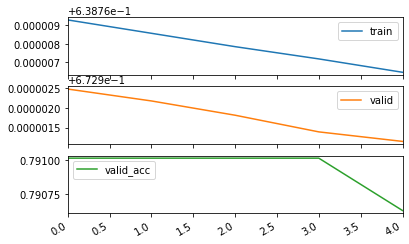

In [175]:
df.plot(subplots=True)

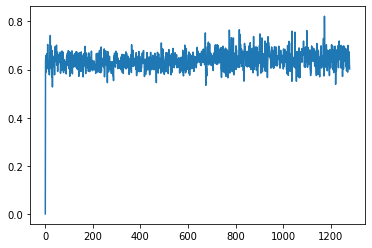

In [176]:
plt.plot(loss_list)

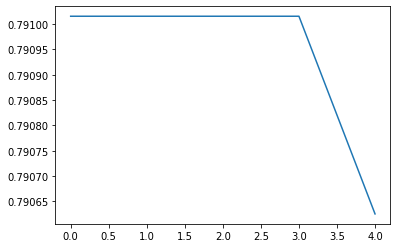

In [177]:
plt.plot(val_acc_list)

## Deep NB